In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'C:\minipro\Datasetcg.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [10]:
b_df=df[(df['Has Table booking']=='Yes')&(df['Has Online delivery']=='Yes')]

In [11]:
print(b_df[['Restaurant Name','Has Table booking','Has Online delivery']])

                       Restaurant Name Has Table booking Has Online delivery
566                     Pizza Di Rocco               Yes                 Yes
571   Cho Gao - Crowne Plaza Abu Dhabi               Yes                 Yes
572                             Gazebo               Yes                 Yes
578                   Indian By Nature               Yes                 Yes
585                      Maharaja Bhog               Yes                 Yes
...                                ...               ...                 ...
9166                           Chili's               Yes                 Yes
9168                        Blue Water               Yes                 Yes
9170                   Tales & Spirits               Yes                 Yes
9171           18 Degrees Resto Lounge               Yes                 Yes
9194                    Saffron Mantra               Yes                 Yes

[435 rows x 3 columns]


In [17]:
percent_b=(len(b_df)/len(df))*100

In [18]:
print(f"\nPercentage of restaurants offering both services:{percent_b:.2f}%")


Percentage of restaurants offering both services:4.55%


In [33]:
avg_ra_with_tableb = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()

In [34]:
avg_ra_without_tableb= df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

In [49]:
print(f"Average rating for restaurants with table booking: {avg_ra_with_tableb:.2f}")
print(f"Average rating for restaurants without table booking: {avg_ra_without_tableb:.2f}")

Average rating for restaurants with table booking: 3.44
Average rating for restaurants without table booking: 2.56


In [37]:
delivery_by_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()
print("Percentage of restaurants with online delivery by price range:")
print(delivery_by_price_range * 100)

Percentage of restaurants with online delivery by price range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


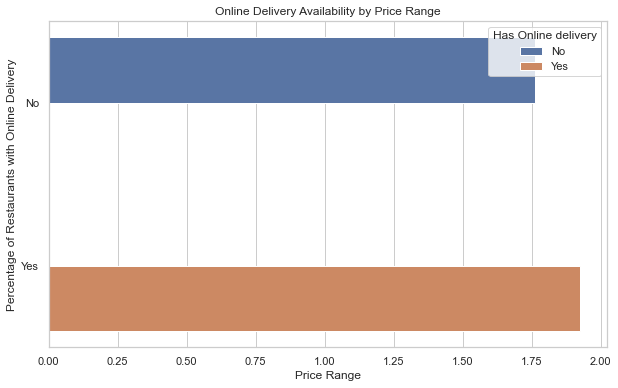

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Price range', y='Has Online delivery', data=df, hue='Has Online delivery', ci=None)
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery')
plt.show()

In [50]:
cm_price_rg = df['Price range'].mode().values[0]
print(f"The most common price range among all the restaurants is: {cm_price_rg}")

The most common price range among all the restaurants is: 1


In [52]:
avg_rat = df.groupby('Price range')['Aggregate rating'].mean()
print("Average rating for each price range:")
print(avg_rat)

Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [69]:
avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean().reset_index()

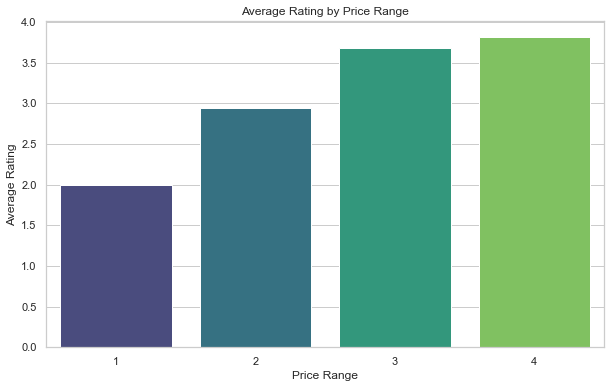

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Price range', y='Aggregate rating', data=avg_rating_by_price, palette='viridis')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

In [72]:
max_avg_rating = avg_rating_by_price['Aggregate rating'].max()
max_avg_rating_price = avg_rating_by_price[avg_rating_by_price['Aggregate rating'] == max_avg_rating]['Price range'].values[0]
print(f"The color representing the highest average rating is associated with the price range: {max_avg_rating_price}")

The color representing the highest average rating is associated with the price range: 4


In [65]:
df['name_length'] = df['Restaurant Name'].apply(len)
df['address_length'] = df['Address'].apply(len)
print(df[['Restaurant Name', 'name_length', 'Address', 'address_length']])

               Restaurant Name  name_length  \
0             Le Petit Souffle           16   
1             Izakaya Kikufuji           16   
2       Heat - Edsa Shangri-La           22   
3                         Ooma            4   
4                  Sambo Kojin           11   
...                        ...          ...   
9546               Naml۱ Gurme           11   
9547              Ceviz A��ac۱           12   
9548                     Huqqa            5   
9549               A���k Kahve           11   
9550  Walter's Coffee Roastery           24   

                                                Address  address_length  
0     Third Floor, Century City Mall, Kalayaan Avenu...              71  
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3     Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...          

In [68]:
df['Has_Table_booking'] = pd.get_dummies(df['Has Table booking'], drop_first=True)
df['Has_Online_delivery'] = pd.get_dummies(df['Has Online delivery'], drop_first=True)
print(df[['Has Table booking', 'Has_Table_booking', 'Has Online delivery', 'Has_Online_delivery']])

     Has Table booking  Has_Table_booking Has Online delivery  \
0                  Yes                  1                  No   
1                  Yes                  1                  No   
2                  Yes                  1                  No   
3                   No                  0                  No   
4                  Yes                  1                  No   
...                ...                ...                 ...   
9546                No                  0                  No   
9547                No                  0                  No   
9548                No                  0                  No   
9549                No                  0                  No   
9550                No                  0                  No   

      Has_Online_delivery  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
9546                   